In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def calcLine( x1 ,y1 ,x2 ,y2 ):
    if x1 == x2:
        return np.array([1, 0, -x1])
    
    m  = (y2-y1) /(x2-x1)
    y =  f" {m}x - {-m*x1} +{y1} "
    
    mX1 = -m
    mX2 =1
    bias= -y1 + m *x1
    return  np.array([mX1 ,mX2 ,bias])


# Rectangle

In [41]:
a = calcLine(2,2,-2,2)
b =calcLine(2,2,2,-2)
c =calcLine(2,-2,-2,-2)
d =calcLine(-2,-2,-2,2)


# o4 = X *d[0] + Y *d[1] + d[2]


## Rectangle

In [42]:
r1 =calcLine(0,1 ,1,0)
r2 =calcLine(1,0,-1,0)
r3 =calcLine(-1,0,0,1)

In [43]:
s1 =calcLine(0,3,1,5)
s2 =calcLine(0,3,-1,5)
s3 =calcLine(1,5,-1,5)

/tmp/ipykernel_31761/4279178622.py:52: UserWarning: linewidths is ignored by contourf
  plt.contourf(X, Y, res, levels=[0.5,1.5], colors=['blue'], linewidths=2)
/tmp/ipykernel_31761/4279178622.py:56: UserWarning: linewidths is ignored by contourf
  plt.contourf(X, Y, res2, levels=[0.5,1.5], colors=['white'], linewidths=2)


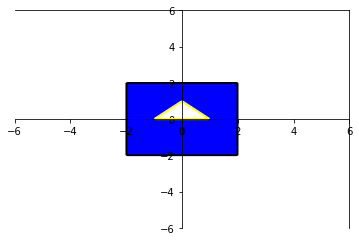

In [44]:

def step(x):
    return 1 if x>=0 else 0
def neuron(x ,w,b):
        return step(x @ w + b)
    
def perceptron(p , x):
    w = np.array([x[0], x[1]])
    b = x[2]
    n1 = neuron(p, w, b)
    return n1


points = np.random.randint(-6, 6, size=(50, 2))

limitPoint = 6
x = np.linspace(-limitPoint, limitPoint, 200)
y = np.linspace(-limitPoint, limitPoint, 200)
X, Y = np.meshgrid(x, y)
Xf = X.flatten()
Yf = Y.flatten()

output1 = np.array([[perceptron(p,-a) for p in zip(Xf, Yf)]])
output1 = output1.reshape(X.shape)

output2 = np.array([[perceptron(p,-b) for p in zip(Xf, Yf)]])
output2 = output2.reshape(X.shape)

output3 = np.array([[perceptron(p,c) for p in zip(Xf, Yf)]])
output3 = output3.reshape(X.shape)

output4 = np.array([[perceptron(p,d) for p in zip(Xf, Yf)]])
output4 = output4.reshape(X.shape)

res =output1*output2*output3*output4




or1 = np.array([[perceptron(p,-r1) for p in zip(Xf, Yf)]])
or1 = or1.reshape(X.shape)

or2 = np.array([[perceptron(p,r2) for p in zip(Xf, Yf)]])
or2 = or2.reshape(X.shape)

or3 = np.array([[perceptron(p,-r3) for p in zip(Xf, Yf)]])
or3 = or3.reshape(X.shape)

res2 = or1 * or2 *or3



plt.contourf(X, Y, res, levels=[0.5,1.5], colors=['blue'], linewidths=2)
plt.contour(X, Y, res, levels=[0.5,1.5], colors=['black'], linewidths=2)


plt.contourf(X, Y, res2, levels=[0.5,1.5], colors=['white'], linewidths=2)
plt.contour(X, Y, res2, levels=[0.5,1.5], colors=['yellow'], linewidths=2)



# Get current axes
ax = plt.gca()
# Move left and bottom spines (axes lines) to the center
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

plt.show()



/tmp/ipykernel_31761/1212347438.py:39: UserWarning: linewidths is ignored by contourf
  plt.contourf(X, Y, res, levels=[0.5, 1.5], colors=[color], linewidths=2)


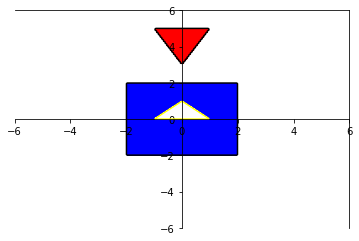

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step function
def step(x):
    return 1 if x >= 0 else 0

# Single neuron
def neuron(x, w, b):
    return step(np.dot(x, w) + b)

def perceptron(p, params):
    w = np.array([params[0], params[1]])
    b = params[2]
    return neuron(p, w, b)

def draW_Shapes(shapes):
    limitPoint =6
    x = np.linspace(-limitPoint ,limitPoint ,200)
    y = np.linspace(-limitPoint ,limitPoint ,200)
    X,Y =  np.meshgrid(x,y)
    xf ,yf =X.flatten() ,Y.flatten()
        
    for shape in shapes:
        params_list =shape["params_list"]
        color =shape.get("color" ,"blue")
        edge_color =shape.get("edge" ,"black")
        
        res =[]
        
        for params in params_list:
            output = np.array( [  [perceptron(p,params) for p in zip(xf,yf)]  ] )
            res.append(output.reshape(X.shape))
        
        res =np.prod(res,axis=0)
        
        plt.contourf(X, Y, res, levels=[0.5, 1.5], colors=[color], linewidths=2)
        plt.contour(X, Y, res, levels=[0.5, 1.5], colors=[edge_color], linewidths=1.5)
    ax = plt.gca()
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    plt.show()


shape1 = {
    "params_list": [[-a[0], -a[1], -a[2]], [-b[0], -b[1], -b[2]], [c[0], c[1], c[2]], [d[0], d[1], d[2]]],
    "color": "blue",
    "edge": "black"
}

# شكل 2 (فتحة)
shape2 = {
    "params_list": [[-r1[0], -r1[1], -r1[2]], [r2[0], r2[1], r2[2]], [-r3[0], -r3[1], -r3[2]]],
    "color": "white",
    "edge": "yellow"
}

shape3 = {
    "params_list": [[s1[0] ,s1[1] ,s1[2]],
                [s2[0], s2[1], s2[2]],
                [-s3[0], -s3[1], -s3[2]]],

    "color": "red",
    "edge": "black"
}

# ممكن تضيفي لحد 10 أشكال بنفس الطريقة:
shapes = [shape1, shape2, shape3]

draW_Shapes(shapes)



